<a href="https://colab.research.google.com/github/sinheechan/Python_Read/blob/main/Python_%ED%83%80%EC%9D%B4%ED%83%80%EB%8B%89_%EB%B6%84%EC%84%9D_%EA%B8%B0%EB%B3%B8_0103.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 문제 설명

##### 타이타닉 데이터셋 내에서 각 변수 분포에 따른 생존자 수 및 생존률을 분석하라

- 생존율과 관련 있는 변수만 남기고 전처리 실시
- 각 변수 별 분포에 따른 생존자 수 비교와 생존율 비교 그래프 시각화

##### 분석 방법 - 생존에 영향을 미치는 요인 분석

# 1. Package Loading

In [ ]:
import numpy as np # numpy import => 파이썬 수치 계산
import pandas as pd # pandas import => 데이터 조작 및 분석
PREVIOUS_MAX_ROWS = pd.options.display.max_rows # 이전에 설정된 최대 표시 행 수를 저장
pd.options.display.max_rows = 20 # 표시할 최대 행 수 = 20
pd.options.display.max_colwidth = 80 # 표시할 최대 열 너비 = 80
pd.options.display.max_columns = 20 # 표시할 최대 열 수 = 20
np.random.seed(2023) # 난수발생 시드 2023 설정
np.set_printoptions(precision=4, suppress=True) # 넘파이 배열 출력 옵션 => 소수점 이하 4자리 표시 및 지수표현 비활성화
import matplotlib.pyplot as plt # matplotlib import => matplotlib의 pyplot 모듈을 plt라는 이름으로 가져옴, 데이터 시각화
import matplotlib
plt.rc('figure', figsize=(8, 4))
import seaborn as sns # 시본 라이브러리를 sns 이름으로 가져옴 => matplotlib 기반 시각화 보안 라이브러리

In [ ]:
sns.set_theme() # seaborn 스타일로 그래프를 설정하겠다.

#2. Data 불러오기

In [ ]:
# fetch_openml은 scikit-learn 라이브러리에서 제공하는 함수
# 머신러닝 리포지터리인 OpenML에서 데이터셋을 가져오는 데 사용
# 이 함수를 사용하면 온라인 리포지터리에서 다양한 머신러닝 데이터셋을 가져올 수 있다.

from sklearn.datasets import fetch_openml

In [ ]:
# 예제에서의 세팅값

X, y = fetch_openml('titanic', version=1, as_frame=True, return_X_y=True)

/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


# 3. Data 구조 파악

## 데이터 구조

In [ ]:
X.shape

(1309, 13)

In [ ]:
X.head()

,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,B5,S,2,None,"St Louis, MO"
1,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,None,NaN,"Montreal, PQ / Chesterville, ON"
3,1.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,C22 C26,S,None,135.0,"Montreal, PQ / Chesterville, ON"
4,1.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,C22 C26,S,None,NaN,"Montreal, PQ / Chesterville, ON"


In [ ]:
X.columns

Index(['pclass', 'name', 'sex', 'age', 'sibsp', 'parch', 'ticket', 'fare',
       'cabin', 'embarked', 'boat', 'body', 'home.dest'],
      dtype='object')

In [ ]:
X.describe()

,pclass,age,sibsp,parch,fare
count,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000
mean,2.294882,29.881135,0.498854,0.385027,33.295479
std,0.837836,14.413500,1.041658,0.865560,51.758668
min,1.000000,0.166700,0.000000,0.000000,0.000000
25%,2.000000,21.000000,0.000000,0.000000,7.895800
50%,3.000000,28.000000,0.000000,0.000000,14.454200
75%,3.000000,39.000000,1.000000,0.000000,31.275000
max,3.000000,80.000000,8.000000,9.000000,512.329200


In [ ]:
X.dtypes

pclass        float64
name           object
sex          category
age           float64
sibsp         float64
parch         float64
ticket         object
fare          float64
cabin          object
embarked     category
boat           object
body           object
home.dest      object
dtype: object

In [ ]:
y

0       1
1       1
2       0
3       0
4       0
       ..
1304    0
1305    0
1306    0
1307    0
1308    0
Name: survived, Length: 1309, dtype: category
Categories (2, object): ['0', '1']

- y 는 데이터 타입 문자열이므로 정수 자료형으로 변환

In [ ]:
y.info() # dtype 범주형 데이터 => 문자열이다.

In [ ]:
y = y.astype('i4') # 원활한 분석을 위해 기존 카테고리형에서 정수 자료형으로 변환

## 데이터 설명

- 1309명 승객의 데이터 포함.

- `X`: 13개의 열(특성) 사용.

| 열 특성 | 의미 |
| :--- | :--- |
| Pclass | 승객 클래스(1 = 1등석; 2 = 2등석; 3 = 3등석) |
| name | 이름 |
| sex | 성(male=남성, female=여성) |
| age | 나이 |
| sibsp | 함께 승선한 형제, 자매, 배우자 수 |
| parch | 함께 승선한 부모 자식 수 |
| ticket | 티켓 번호 |
| fare | 티켓 요금 (영국 파운드) |
| cabin | 객실 번호 |
| embarked | 승선한 항구 (C = Cherbourg; Q = Queenstown; S = Southampton) |
| boat | 침몰시 탑승한 구명보트 번호 |
| body | 사망자인 경우 지정된 번호 |
| home.dest | 고향/목적지 |

# 4. Data 전처리

##### 4-1. 생존과 필요없는 항목 제거
- 'boat', 'body', 'home.dest', 'ticket'

In [ ]:
X.drop(['boat', 'body', 'home.dest', 'ticket'], axis = 1, inplace = True)

X.head

<bound method NDFrame.head of       pclass                                             name     sex  \
0        1.0                    Allen, Miss. Elisabeth Walton  female   
1        1.0                   Allison, Master. Hudson Trevor    male   
2        1.0                     Allison, Miss. Helen Loraine  female   
3        1.0             Allison, Mr. Hudson Joshua Creighton    male   
4        1.0  Allison, Mrs. Hudson J C (Bessie Waldo Daniels)  female   
...      ...                                              ...     ...   
1304     3.0                             Zabour, Miss. Hileni  female   
1305     3.0                            Zabour, Miss. Thamine  female   
1306     3.0                        Zakarian, Mr. Mapriededer    male   
1307     3.0                              Zakarian, Mr. Ortin    male   
1308     3.0                               Zimmerman, Mr. Leo    male   

          age  sibsp  parch      fare    cabin embarked  
0     29.0000    0.0    0.0  211.33

In [ ]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   pclass    1309 non-null   float64 
 1   name      1309 non-null   object  
 2   sex       1309 non-null   category
 3   age       1046 non-null   float64 
 4   sibsp     1309 non-null   float64 
 5   parch     1309 non-null   float64 
 6   fare      1308 non-null   float64 
 7   cabin     295 non-null    object  
 8   embarked  1307 non-null   category
dtypes: category(2), float64(5), object(2)
memory usage: 74.5+ KB


##### 4-2. 결측치 여부 확인 및 제거

- 변수 별 결측치 합계 도출

In [ ]:
X.isnull().sum()

pclass         0
name           0
sex            0
age          263
sibsp          0
parch          0
fare           1
cabin       1014
embarked       2
dtype: int64

- 결측치 비율 확인 : 결측값의 합 / 전체 값 * 100

In [ ]:
nul_values = X.isnull().sum() / len(X) * 100
nul_values

pclass       0.000000
name         0.000000
sex          0.000000
age         20.091673
sibsp        0.000000
parch        0.000000
fare         0.076394
cabin       77.463713
embarked     0.152788
dtype: float64

- 결측치 비율 많은 칼럼 삭제

In [ ]:
X.drop(["cabin"], axis = 1, inplace = True)

In [ ]:
X.isnull().sum()

pclass        0
name          0
sex           0
age         263
sibsp         0
parch         0
fare          1
embarked      2
dtype: int64

##### 4-3. 데이터 전처리

- 동반 탑승자를 분류하는 family 칼럼 생성

In [ ]:
# sibsp	함께 승선한 형제, 자매, 배우자 수
# parch	함께 승선한 부모 자식 수

X["family"] = pd.concat([X["parch"], X["sibsp"]], axis = 1).sum(axis = 1)
X

,pclass,name,sex,age,sibsp,parch,fare,embarked,family
0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,211.3375,S,0.0
1,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,151.5500,S,3.0
2,1.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,151.5500,S,3.0
3,1.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,151.5500,S,3.0
4,1.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,151.5500,S,3.0
...,...,...,...,...,...,...,...,...,...
1304,3.0,"Zabour, Miss. Hileni",female,14.5000,1.0,0.0,14.4542,C,1.0
1305,3.0,"Zabour, Miss. Thamine",female,NaN,1.0,0.0,14.4542,C,1.0
1306,3.0,"Zakarian, Mr. Mapriededer",male,26.5000,0.0,0.0,7.2250,C,0.0
1307,3.0,"Zakarian, Mr. Ortin",male,27.0000,0.0,0.0,7.2250,C,0.0


- family 칼럼 생성 후 관련 데이터 삭제

In [ ]:
X.drop(["parch", "sibsp"], axis = 1, inplace = True)
X

,pclass,name,sex,age,fare,embarked,family
0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,211.3375,S,0.0
1,1.0,"Allison, Master. Hudson Trevor",male,0.9167,151.5500,S,3.0
2,1.0,"Allison, Miss. Helen Loraine",female,2.0000,151.5500,S,3.0
3,1.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,151.5500,S,3.0
4,1.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,151.5500,S,3.0
...,...,...,...,...,...,...,...
1304,3.0,"Zabour, Miss. Hileni",female,14.5000,14.4542,C,1.0
1305,3.0,"Zabour, Miss. Thamine",female,NaN,14.4542,C,1.0
1306,3.0,"Zakarian, Mr. Mapriededer",male,26.5000,7.2250,C,0.0
1307,3.0,"Zakarian, Mr. Ortin",male,27.0000,7.2250,C,0.0


- alone 칼럼 추가 : 혼자 탑승한 승객은 1, 가족과 같이 온 사람은 0으로 변환

In [ ]:
X["alone"] = "0"

mask = X["family"] == 0
X.loc[mask,"alone"] = 1

X

,pclass,name,sex,age,fare,embarked,family,alone
0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,211.3375,S,0.0,1
1,1.0,"Allison, Master. Hudson Trevor",male,0.9167,151.5500,S,3.0,0
2,1.0,"Allison, Miss. Helen Loraine",female,2.0000,151.5500,S,3.0,0
3,1.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,151.5500,S,3.0,0
4,1.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,151.5500,S,3.0,0
...,...,...,...,...,...,...,...,...
1304,3.0,"Zabour, Miss. Hileni",female,14.5000,14.4542,C,1.0,0
1305,3.0,"Zabour, Miss. Thamine",female,NaN,14.4542,C,1.0,0
1306,3.0,"Zakarian, Mr. Mapriededer",male,26.5000,7.2250,C,0.0,1
1307,3.0,"Zakarian, Mr. Ortin",male,27.0000,7.2250,C,0.0,1


- 승객 이름에 따른 성별 분류
  - 호칭이 너무 많아 간소화한다.
  - Mrs 로 통일 : Ms, Lady, Mlle, Mme > 전부 여성을 지칭한다.
  - 값이 10 미만인 이름은 etc로 이름 지정

In [ ]:
X.alone

- 성별을 표시하는 영역만 추출

In [27]:
X['title'] =  X['name'].str.split(", ", expand=True)[1].str.split(".", expand=True)[0]
X.drop(['name'], axis=1, inplace=True)
X.head()

,pclass,sex,age,fare,embarked,family,alone,title
0,1.0,female,29.0000,211.3375,S,0.0,1,Miss
1,1.0,male,0.9167,151.5500,S,3.0,0,Master
2,1.0,female,2.0000,151.5500,S,3.0,0,Miss
3,1.0,male,30.0000,151.5500,S,3.0,0,Mr
4,1.0,female,25.0000,151.5500,S,3.0,0,Mrs


- 어떤 항목이 남성, 여성만을 지칭하는지 분류

In [30]:
pd.crosstab(X['title'], X['sex'])

sex,female,male
title,,
Capt,0,1
Col,0,4
Don,0,1
Dona,1,0
Dr,1,7
Jonkheer,0,1
Major,0,2
Master,0,61
Mr,0,757


- 여성만 지칭하는 항목 전부 Mrs로 통일

In [28]:
mask = (X.title == 'Miss') | (X.title == 'Ms') | (X.title == 'Lady') | (X.title == 'Mlle') | (X.title == 'Mme')
X.loc[mask, 'title'] = 'Mrs'
X

,pclass,sex,age,fare,embarked,family,alone,title
0,1.0,female,29.0000,211.3375,S,0.0,1,Mrs
1,1.0,male,0.9167,151.5500,S,3.0,0,Master
2,1.0,female,2.0000,151.5500,S,3.0,0,Mrs
3,1.0,male,30.0000,151.5500,S,3.0,0,Mr
4,1.0,female,25.0000,151.5500,S,3.0,0,Mrs
...,...,...,...,...,...,...,...,...
1304,3.0,female,14.5000,14.4542,C,1.0,0,Mrs
1305,3.0,female,NaN,14.4542,C,1.0,0,Mrs
1306,3.0,male,26.5000,7.2250,C,0.0,1,Mr
1307,3.0,male,27.0000,7.2250,C,0.0,1,Mr


- 인원이 10개 미만인 호칭은 모두 etc로 통일

In [29]:
etc_titles = (X['title'].value_counts() < 10)
etc_titles

Mr              False
Mrs             False
Master          False
Dr               True
Rev              True
Col              True
Major            True
Capt             True
Sir              True
Dona             True
Jonkheer         True
the Countess     True
Don              True
Name: title, dtype: bool

In [31]:
X['title'] = X.title.apply(lambda x: 'etc' if etc_titles[x] else x)
X

,pclass,sex,age,fare,embarked,family,alone,title
0,1.0,female,29.0000,211.3375,S,0.0,1,Mrs
1,1.0,male,0.9167,151.5500,S,3.0,0,Master
2,1.0,female,2.0000,151.5500,S,3.0,0,Mrs
3,1.0,male,30.0000,151.5500,S,3.0,0,Mr
4,1.0,female,25.0000,151.5500,S,3.0,0,Mrs
...,...,...,...,...,...,...,...,...
1304,3.0,female,14.5000,14.4542,C,1.0,0,Mrs
1305,3.0,female,NaN,14.4542,C,1.0,0,Mrs
1306,3.0,male,26.5000,7.2250,C,0.0,1,Mr
1307,3.0,male,27.0000,7.2250,C,0.0,1,Mr


- 4개의 성으로 요약 된 것을 확인

In [32]:
X.title.value_counts()

Mr        757
Mrs       463
Master     61
etc        28
Name: title, dtype: int64

# 5. 데이터 기초분석

#### 5-1. X 와 y를 결합한다.

In [33]:
comb = pd.concat([X, y], axis=1)
comb

,pclass,sex,age,fare,embarked,family,alone,title,survived
0,1.0,female,29.0000,211.3375,S,0.0,1,Mrs,1
1,1.0,male,0.9167,151.5500,S,3.0,0,Master,1
2,1.0,female,2.0000,151.5500,S,3.0,0,Mrs,0
3,1.0,male,30.0000,151.5500,S,3.0,0,Mr,0
4,1.0,female,25.0000,151.5500,S,3.0,0,Mrs,0
...,...,...,...,...,...,...,...,...,...
1304,3.0,female,14.5000,14.4542,C,1.0,0,Mrs,0
1305,3.0,female,NaN,14.4542,C,1.0,0,Mrs,0
1306,3.0,male,26.5000,7.2250,C,0.0,1,Mr,0
1307,3.0,male,27.0000,7.2250,C,0.0,1,Mr,0


#### 5-2. 변수 간 상관성 확인

- 수치형 변수 확인

In [34]:
num_f = comb.describe().columns
num_f

Index(['pclass', 'age', 'fare', 'family', 'survived'], dtype='object')

- 피어슨 상관계수 : 수치형 변수간의 상관성 요약표 확인

In [35]:
corr = comb[num_f].corr()
corr

,pclass,age,fare,family,survived
pclass,1.000000,-0.408106,-0.558629,0.050027,-0.312469
age,-0.408106,1.000000,0.178739,-0.240230,-0.055513
fare,-0.558629,0.178739,1.000000,0.226492,0.244265
family,0.050027,-0.240230,0.226492,1.000000,0.026876
survived,-0.312469,-0.055513,0.244265,0.026876,1.000000


- 히트맵 시각화

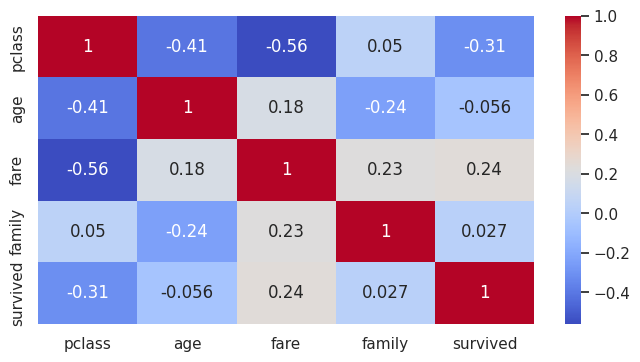

In [36]:
ax = sns.heatmap(corr, annot=True, cmap='coolwarm')

 survived, familiy 변수가 fare(티켓요금)에 대해 상대적으로 높은 상관관계가 도출된다.

- 성별 생존자 수 파악

In [37]:
sur = comb.survived.value_counts() # 0 : 사망자, 1 : 생존자
sur

0    809
1    500
Name: survived, dtype: int64

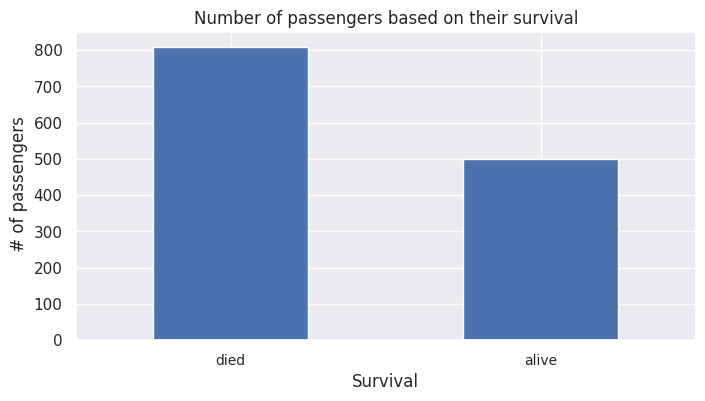

In [38]:
fig, ax = plt.subplots()
sur.plot(kind='bar', xticks=[0,1], rot=0)
ax.set_xticklabels(['died', 'alive'], fontsize=10)
ax.set(xlabel='Survival', ylabel=' # of passengers', title='Number of passengers based on their survival')
plt.show()

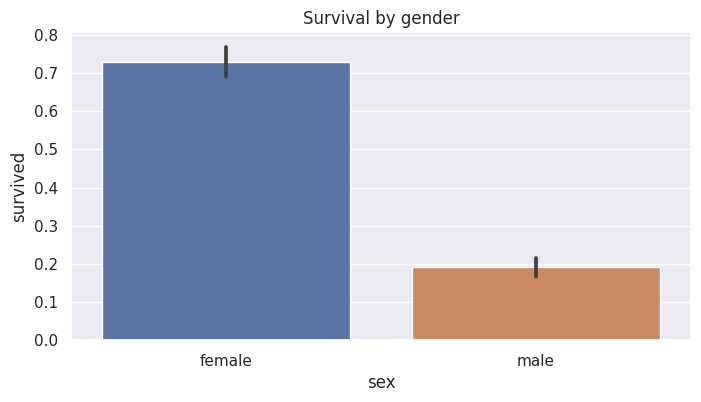

In [48]:
sns.barplot(data=comb, x='sex', y='survived')
plt.title('Survival by gender')
plt.show()

남성 생존자 대비 여성 생존자 수가 약 3.5배 많다.

- 나이대 별 생존자 수 분석

In [49]:
comb.age.isnull().sum()

263

In [50]:
comb.age.dropna()

0       29.0000
1        0.9167
2        2.0000
3       30.0000
4       25.0000
         ...   
1301    45.5000
1304    14.5000
1306    26.5000
1307    27.0000
1308    29.0000
Name: age, Length: 1046, dtype: float64

In [51]:
comb['age'][comb.survived == 1].dropna()

0       29.0000
1        0.9167
5       48.0000
6       63.0000
8       53.0000
         ...   
1261    63.0000
1277    22.0000
1286    38.0000
1290    47.0000
1300    15.0000
Name: age, Length: 427, dtype: float64

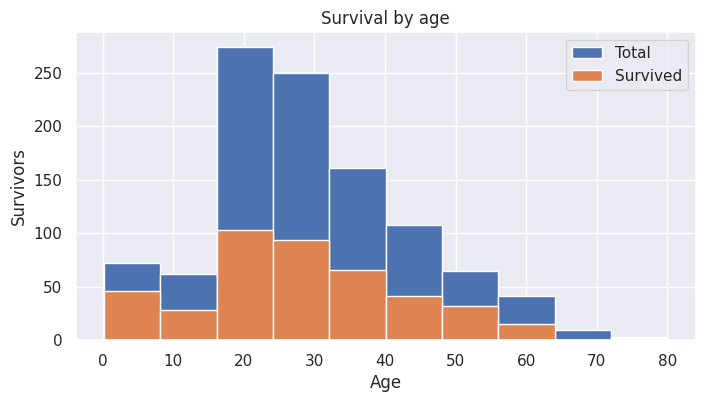

In [52]:
fig, ax = plt.subplots()
ax.hist(comb.age.dropna(), label='Total')
ax.hist(comb['age'][comb.survived == 1].dropna(), label='Survived')
plt.ylabel('Survivors')
plt.xlabel('Age')
plt.title('Survival by age')
plt.legend() # 범례표시
plt.show()

20대, 30대의 생존자 수가 가장 높다.

- pclass 별 생존자 수 분석

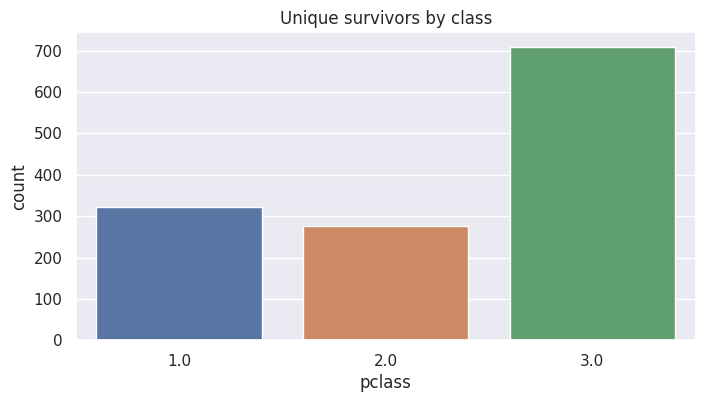

In [53]:
sns.countplot(x='pclass', data=comb)
plt.title('Unique survivors by class')
plt.show()

3등석이 가장 많이 살아남았다. => 제일 싼 pclass

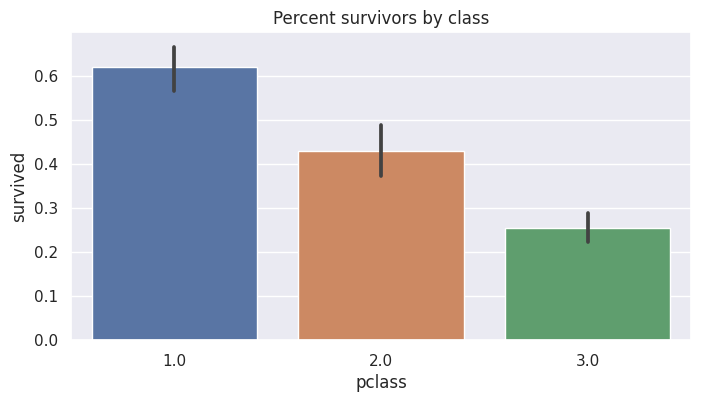

In [54]:
sns.barplot(x='pclass', y='survived', data=comb)
plt.title('Percent survivors by class')
plt.show()

하지만, pclass 각 클래스 별 탑승객 대비 생존자 비율은 1등석이 가장 높았다.

- 10살 단위 구간으로 연령별 생존률 구하기

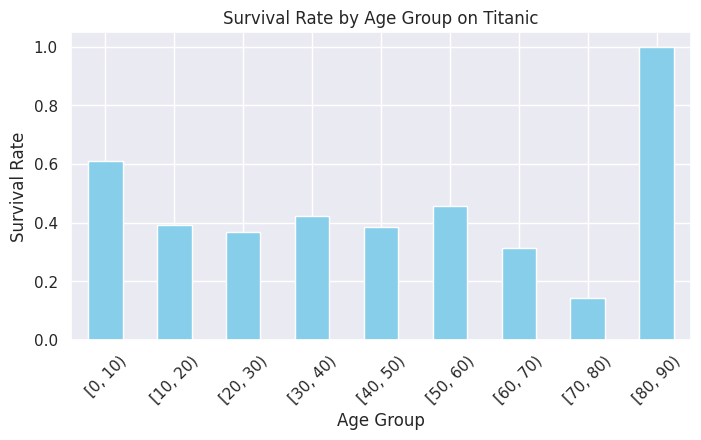

In [55]:
comb['AgeGroup'] = pd.cut(comb['age'], bins=range(0, 100, 10), right=False)
age_group_survival = comb.groupby('AgeGroup')['survived'].mean()

age_group_survival.plot(kind='bar', color='skyblue')
plt.xlabel('Age Group')
plt.ylabel('Survival Rate')
plt.title('Survival Rate by Age Group on Titanic')
plt.xticks(rotation=45)
plt.show()

노인과 아이들 위주로 생존률이 가장 높았다.